Number of unique mice IDs in merged DataFrame: 249
Mouse IDs with duplicate time points:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21  

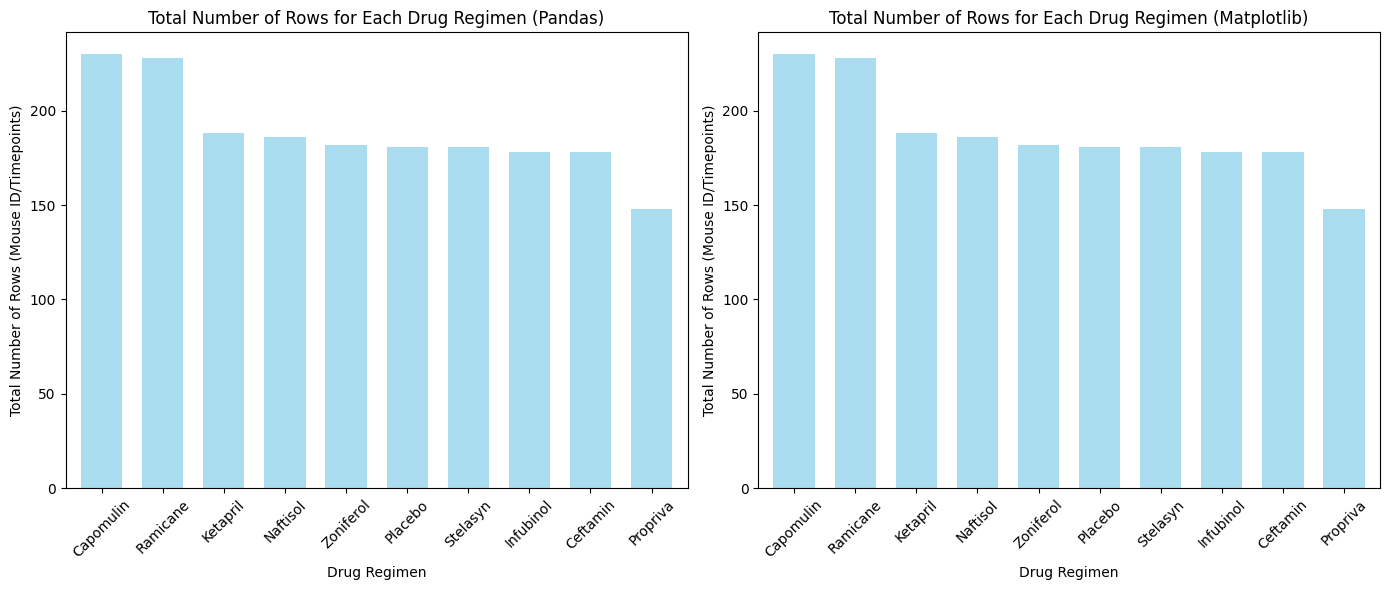

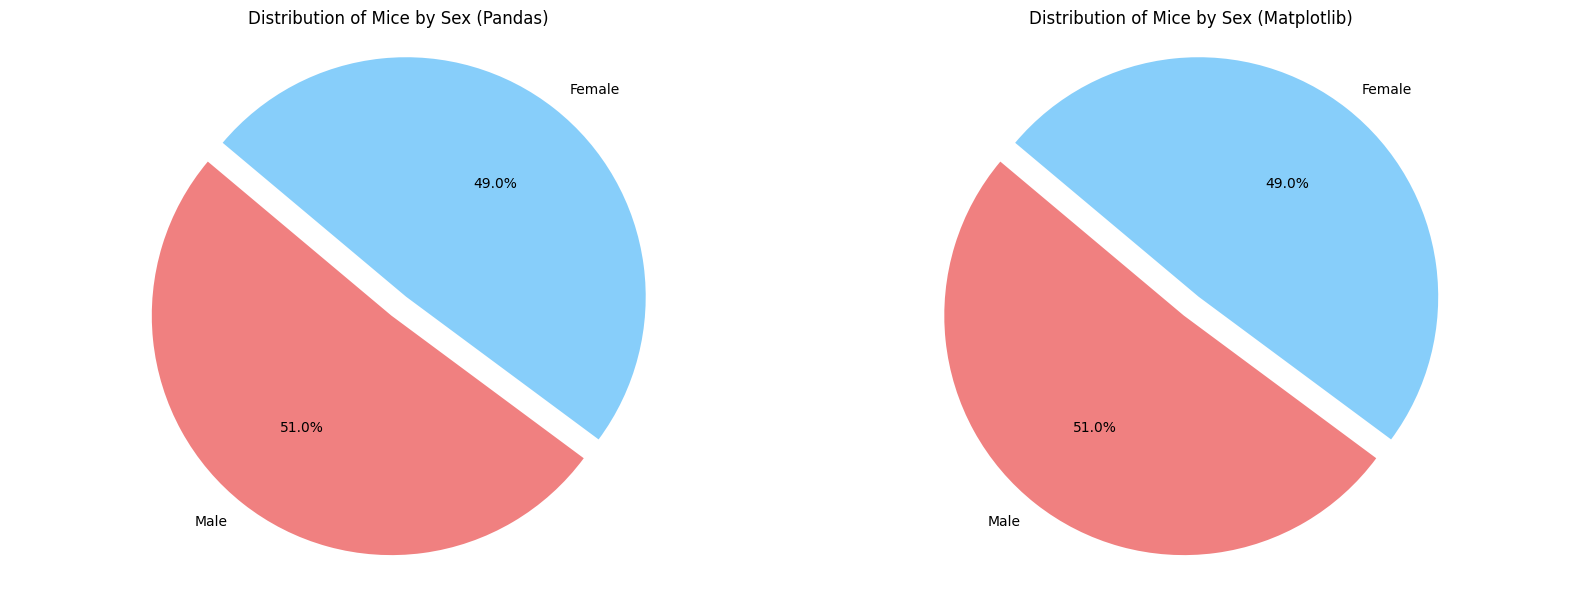

In [8]:
# Import the pandas library and read and merge data from provided URLs using the common 'Mouse ID' column.
import pandas as pd
merged_df = pd.read_csv('https://raw.githubusercontent.com/GBov81/Module-5/main/Pymaceuticals/data/Mouse_metadata.csv')\
    .merge(pd.read_csv('https://raw.githubusercontent.com/GBov81/Module-5/main/Pymaceuticals/data/Study_results.csv'), on='Mouse ID')

# Display the number of unique mice IDs in the merged DataFrame.
print("Number of unique mice IDs in merged DataFrame:", merged_df['Mouse ID'].nunique())

# Check for mouse IDs with duplicate time points.
duplicate_mouse_ids = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID']

# Display the data associated with mouse IDs having duplicate time points.
print("Mouse IDs with duplicate time points:")
print(merged_df[merged_df['Mouse ID'].isin(duplicate_mouse_ids)])

# Create a new DataFrame with data removed for mouse IDs having duplicate time points.
cleaned_df = merged_df[~merged_df['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the updated number of unique mice IDs in the cleaned DataFrame.
print("Number of unique mice IDs in the cleaned DataFrame:", cleaned_df['Mouse ID'].nunique())

# Create the summary statistics DataFrame.
summary_stats_df = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for comprehension and clarity.
summary_stats_df = summary_stats_df.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume SD',
    'sem': 'Tumor Volume SEM'
})
# Display the summary statistics DataFrame.
print("Summary Statistics:")
print(summary_stats_df)

# Import the Matplotlib library for data visualization.
import matplotlib.pyplot as plt

# Create a figure with subplots for both bar charts and define chart titles for each subplot.
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 
chart_titles = ['Total Number of Rows for Each Drug Regimen (Pandas)', 'Total Number of Rows for Each Drug Regimen (Matplotlib)']

# Create the first bar chart using DataFrame.plot().
cleaned_df['Drug Regimen'].value_counts().plot(kind='bar', color='skyblue', alpha=0.7, ax=axes[0], width=0.675)

# Data preparation for the second chart (using Matplotlib).
drug_regimen_counts = cleaned_df['Drug Regimen'].value_counts()
x_values = drug_regimen_counts.index
y_values = drug_regimen_counts.values

# Create the second bar chart using Matplotlib's bar function.
axes[1].bar(x_values, y_values, color='skyblue', alpha=0.7, width=0.675)

# Match x-axis limits of the second chart to the first chart.
axes[1].set_xlim(axes[0].get_xlim())

# Customize both subplots.
for ax, title in zip(axes, chart_titles):
    ax.set_xlabel('Drug Regimen')
    ax.set_ylabel('Total Number of Rows (Mouse ID/Timepoints)')
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)

# Adjust spacing between subplots and display both bar charts.
plt.tight_layout()
plt.show()

# Data preparation for the distribution of male and female mice and creation of subplots for both pie charts.
sex_distribution = cleaned_df['Sex'].value_counts()
titles = ['Distribution of Mice by Sex (Pandas)', 'Distribution of Mice by Sex (Matplotlib)']
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the first pie chart using Pandas DataFrame.plot().
sex_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=140, explode=[0.1, 0], ax=axes[0],)
axes[0].set_title(titles[0])
axes[0].set_ylabel('')
axes[0].axis('equal')

# Plot the second pie chart using Matplotlib pyplot function.
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=140, explode=[0.1, 0],)
axes[1].set_title(titles[1])
axes[1].set_ylabel('')
axes[1].axis('equal')

# Adjust spacing between subplots and display both pie charts.
plt.tight_layout()
plt.show()


